In [1]:
from lib.BBVisualizations import BBVisualization

c:\Users\User\Documents\Unibo\NLP\BarneyBot\.env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model

Machine Translation


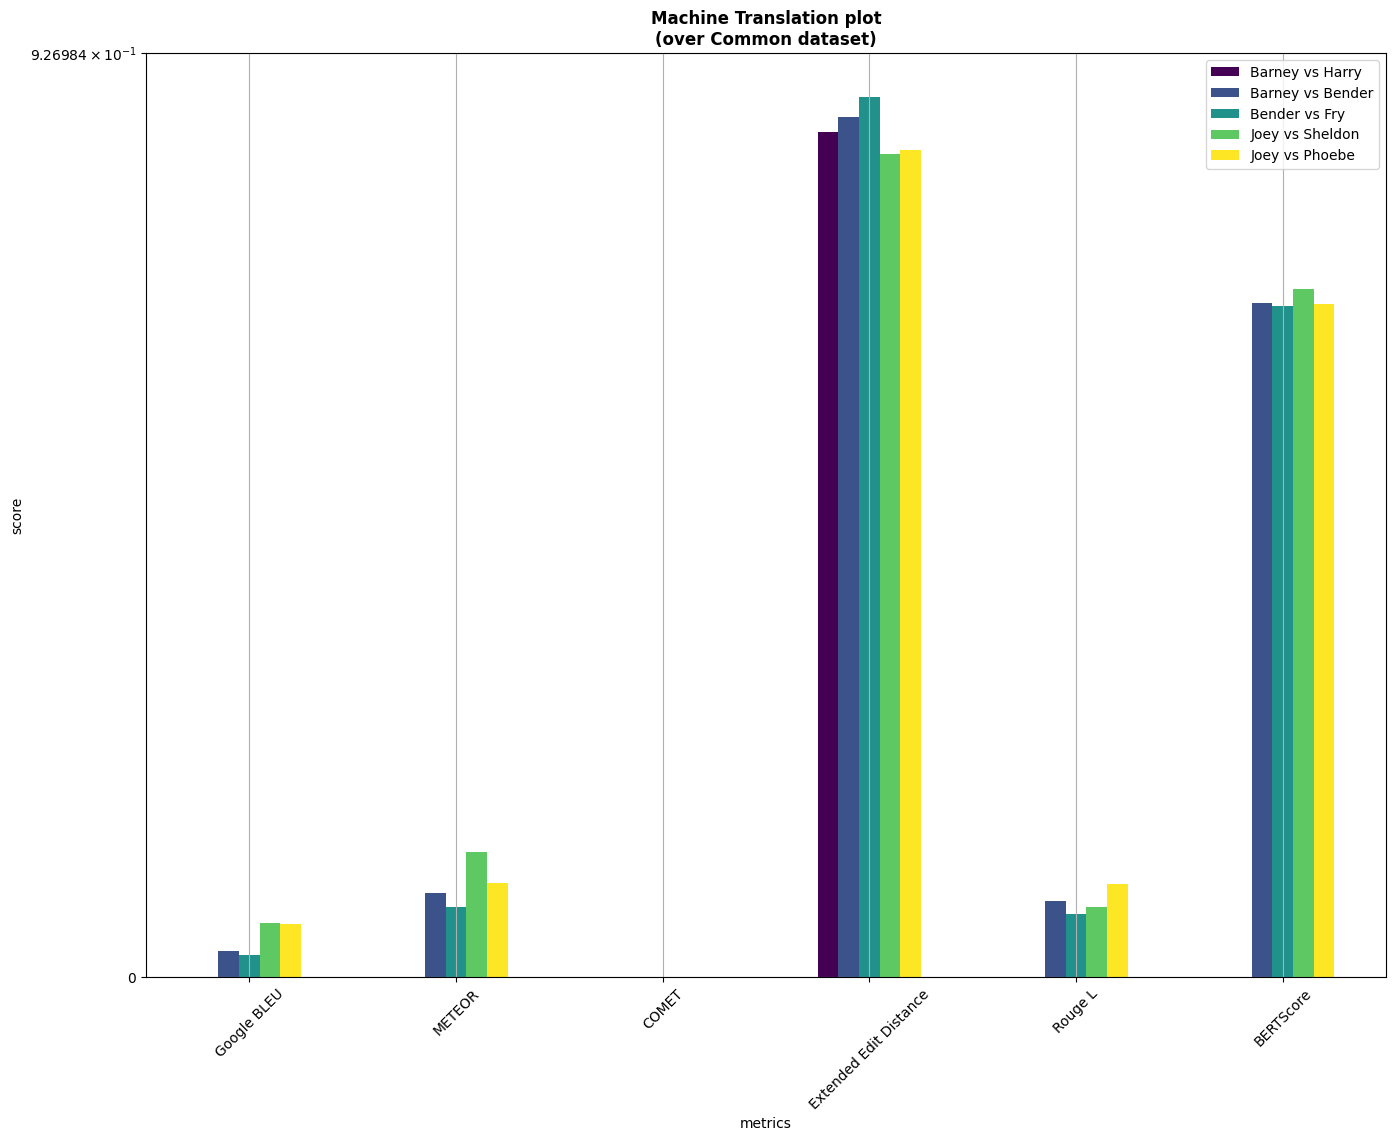

In [5]:
BBVisualization.load_visualization("Machine Translation", adversarial=True, debug=False).plot()

{'metrics': ['DISTINCT', 'Repetitiveness', 'BLEURT', 'Perplexity', 'Flesch-Kincaid Index', 'T5 Grammar Correction Edit Distance', 'Term Error Rate', 'Word Mover Distance'], 'Barney vs Harry': [0, 0, 0, 0, 0, 0, 0, 0.9073388596190624], 'Barney vs Bender': [0, 0, -1.5171347941671098, 0, 0, 0, 224.2791745403921, 0.793358193311851], 'Bender vs Fry': [0, 0, -1.4691058993339539, 0, 0, 0, 235.46967560412938, 0.8785332981247419], 'Joey vs Sheldon': [0, 0, -1.403519197021212, 0, 0, 0, 289.7205257805224, 0.9429130329829615], 'Joey vs Phoebe': [0, 0, -1.3924680352210999, 0, 0, 0, 296.21820785730563, 0.8579528137105173]}
Text Generation


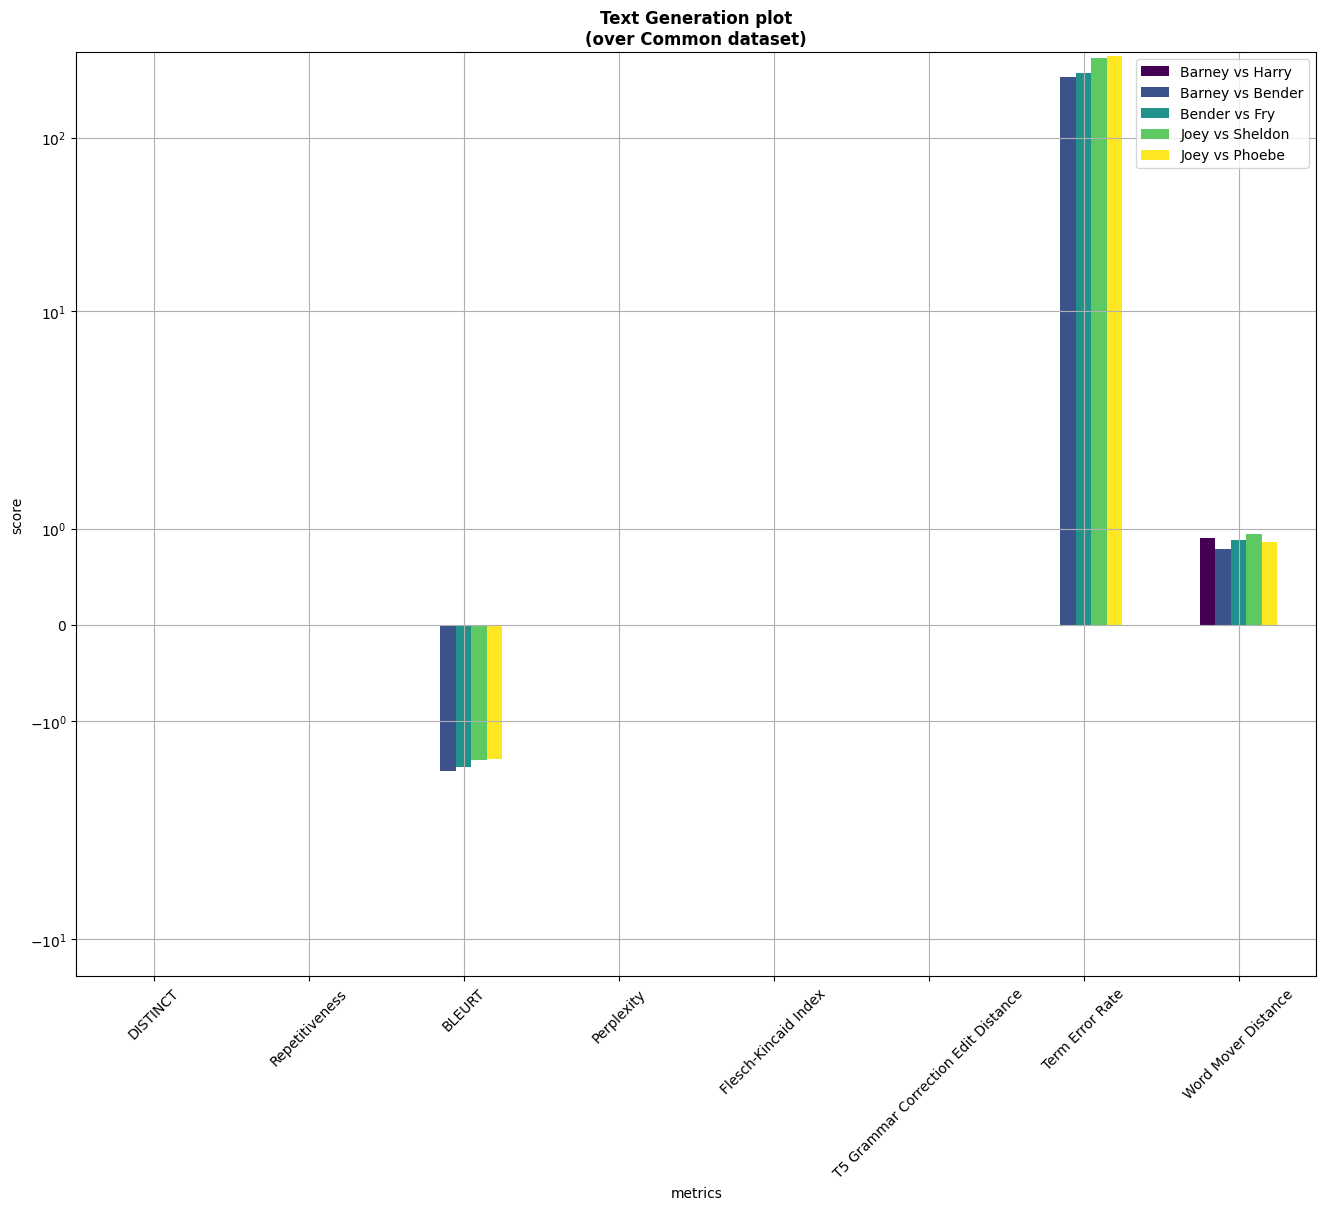

In [7]:
characters = ['Barney vs Harry', 'Barney vs Bender', 'Bender vs Fry', 'Joey vs Sheldon', 'Joey vs Phoebe']
BBVisualization.load_visualization("Text Generation", adversarial=True, debug=True, characters=characters).plot(logscale=True)
# BBVisualization.load_visualization("Text Generation", adversarial=True, debug=False).plot(logscale=True)